# Capstone Project - The Battle of Neighborhoods in Berlin (Week 2)

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

A café owner would like to open a **new café** in **Berlin, Germany**. She already has two cafés in Lisbon, Portugal, and Dublin, Irland. Her new café will add up to her current business. The choice of the city was based on two factors: a big city and the hipster community. Furthermore, Berlin is well-known with low rent prices and a variety of international representatives. The café is a bio vegan café. It will offer not only a fresh brew bio coffee but also bio pastry entirely made by vegan products. The owner is looking at where will be **the best place in Berlin** to open her new business venture. With a variety of areas, Berlin offers a wide range of cuisine and refreshment places. Therefore, it is essential that the café is in the right neighborhood, where it could reach the target clients.

There are several factors under consideration when someone wants to open a new business. Some of them are the population, the price of the rent, the average salary of the residents, the lifestyle of the residents, and so on. One of the factors is the number of **competition that offers similar services**. In our case, every other place which serves primarily coffee products and light snacks is under that category. Therefore, such a place to open a **new café should be in an area where the competition is not dense**.

A comparison between Berlin's neighborhoods will be conducted. Based on the venue category related to coffee places, the top choices in each district will be presented by using **Foursquare API**. Using a **k-means clustering**, an unsupervised machine learning method, which will split the n number of samples into k number clusters, where each sample belongs to one of the clusters. Then, the results from the analysis will be presented, and a recommendation of **the best place for opening a bio vegan café** will be proposed. The proposal will be shortly discussed concerning the business goal.

# Data <a name="data"></a>

Berlin has a total of 12 boroughs and 96 neighborhoods. A data set, containing their names and coordinates, was created. The coordinates were based on information posted on Wikipedia. A pandas dataframe created from the data table is shown below.

Following data sources will be needed to extract/generate the required information:
* List of boroughs and their neighborhoods in Berlin collected from Wikipedia
* Number of coffee places and location in every neighborhood will be obtained using **Foursquare API**

### Import labriries 

In [2]:
!pip install folium

     |████████████████████████████████| 102kB 7.4MB/s ta 0:00:011


In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

import types
from botocore.client import Config
import ibm_boto3

### Data preparation

No Wiki page  was found which counting the coordinates of all neighbourhoods in Berlin, Germany. Therefore, a new table was created and imported as csv file in the IBM Cloud Notebook. The table contains the borough, the neighbourhood, the latitude, and the longitude.

### Load the data of Berlin's neighborhoods coordinates from a csv file

In [4]:
berlin_data = pd.read_csv(body)
berlin_data

,Borough,Neighborhood,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,Charlottenburg,52.516667,13.300000
1,Charlottenburg-Wilmersdorf,Wilmersdorf,52.483333,13.316667
2,Charlottenburg-Wilmersdorf,Schmargendorf,52.477222,13.288056
3,Charlottenburg-Wilmersdorf,Grunewald,52.483333,13.266667
4,Charlottenburg-Wilmersdorf,Westend,52.516667,13.283333
5,Charlottenburg-Wilmersdorf,Charlottenburg-Nord,52.538889,13.293056
6,Charlottenburg-Wilmersdorf,Halensee,52.494722,13.285556
7,Friedrichshain-Kreuzberg,Friedrichshain,52.515833,13.454167
8,Friedrichshain-Kreuzberg,Kreuzberg,52.487500,13.383333
9,Lichtenberg,Friedrichsfelde,52.505833,13.519167


In [5]:
# removeing trailing characters in the dataframe
berlin_data['Borough'] = berlin_data['Borough'].str.strip()
berlin_data['Neighborhood'] = berlin_data['Neighborhood'].str.strip()

In [6]:
# sort the data by borough names
berlin_data = berlin_data.sort_values(by=['Borough'])
berlin_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,Charlottenburg,52.516667,13.300000
1,Charlottenburg-Wilmersdorf,Wilmersdorf,52.483333,13.316667
2,Charlottenburg-Wilmersdorf,Schmargendorf,52.477222,13.288056
3,Charlottenburg-Wilmersdorf,Grunewald,52.483333,13.266667
4,Charlottenburg-Wilmersdorf,Westend,52.516667,13.283333


### Create map of Berlin

In [53]:
# get the geo location of Berlin
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="berlin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
berlin_center = (latitude, longitude)
print('The geograpical coordinate of Berlin, Germany are {}, {}.'.format(latitude, longitude))
berlin_center

The geograpical coordinate of Berlin, Germany are 52.5170365, 13.3888599.


(52.5170365, 13.3888599)

In [19]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

# show on the map the neighborhoods using markers
locations = berlin_data[['Latitude', 'Longitude']]
locationlist = locations.values.tolist() 

# combine the markers on the map in clusters
marker_cluster = MarkerCluster().add_to(map_berlin)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=berlin_data['Neighborhood'][point]).add_to(marker_cluster)

# show the map
map_berlin

## Methodology

### Foursquare API usage

#### Define Foursquare Credentials and Version

In [ ]:
# make a query to teh Fourtsquare API
CLIENT_ID = '*****' # your Foursquare ID
CLIENT_SECRET = '*****' # your Foursquare Secret
VERSION = '20200409' # Foursquare API version 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### Get the neighborhood's name, latitude, and longitude of the first listed neighborhood

In [21]:
berlin_data.loc[0, 'Neighborhood']

'Charlottenburg'

In [22]:
# neighborhood latitude value
neighborhood_latitude = berlin_data.loc[0, 'Latitude'] 
# neighborhood longitude value
neighborhood_longitude = berlin_data.loc[0, 'Longitude'] 
# neighborhood name
neighborhood_name = berlin_data.loc[0, 'Neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Charlottenburg are 52.516667000000005, 13.3.


#### Get the top 100 venues that are in Charlottenburg within a radius of 500 meters

In [23]:
# create the GET request URL
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    latitude,
    longitude,
    radius,
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=RDALYA2BYXWTZ4JHEGHRVQAKSUQDAGRTRBV5HGYUQKISISIU&client_secret=TBMTSTGEE11HXVELRV25UDF2NM5SDEVRNMYRVZFPZ0CYBETY&v=20200409&ll=52.5170365,13.3888599&radius=500&limit=100'

In [24]:
# send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb8fcf39c6f59001ccfb30b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Unter den Linden',
  'headerFullLocation': 'Unter den Linden, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 73,
  'suggestedBounds': {'ne': {'lat': 52.521536504500006,
    'lng': 13.39624102445079},
   'sw': {'lat': 52.5125364955, 'lng': 13.38147877554921}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcda8ef964a520a74a21e3',
       'name': 'Dussmann das KulturKaufhaus',
       'location': {'address': 'Friedrichstr. 90',
        'lat': 52.518343,
        'lng': 13.388965,
        'labeledLatLngs': [{'label': 'display',
          'lat': 5

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Clean the json and structure it into a pandas dataframe

In [26]:
venues = results['response']['groups'][0]['items']
# flatten JSON
nearby_venues = json_normalize(venues) 

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Dussmann das KulturKaufhaus,Bookstore,52.518343,13.388965
1,Dussmann English Bookshop,Bookstore,52.518223,13.389239
2,Cookies Cream,Vegetarian / Vegan Restaurant,52.516569,13.388008
3,Freundschaft,Wine Bar,52.518294,13.390344
4,Komische Oper,Opera House,52.515968,13.386701


In [27]:
# shows how many venues are returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

73 venues were returned by Foursquare.


#### Create a function to repeat the same process to all the neighborhoods in Berlin

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            

        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
   
    return(nearby_venues)

In [29]:
# create a new dataframe called berlin_venues
berlin_venues = getNearbyVenues(names=berlin_data['Neighborhood'],
                                   latitudes=berlin_data['Latitude'],
                                   longitudes=berlin_data['Longitude']
                                  )

Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee
Friedrichshain
Kreuzberg
Rummelsburg
Fennpfuhl
Alt-Hohenschönhausen
Neu-Hohenschönhausen
Wartenberg
Karlshorst
Falkenberg
Lichtenberg
Friedrichsfelde
Malchow
Hellersdorf
Mahlsdorf
Biesdorf
Marzahn
Kaulsdorf
Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Britz
Neukölln
Buckow
Rudow
Gropiusstadt
Buch
FranzösischBuchholz
Blankenfelde
Rosenthal
Niederschönhausen
Pankow
Wilhelmsruh
Karow
Heinersdorf
Blankenburg
Weissensee
PrenzlaürBerg
StadtrandsiedlungMalchow
Borsigwalde
MärkischesViertel
Lübars
Waidmannslust
Hermsdorf
Wittenau
Heiligensee
Konradshöhe
Tegel
Reinickendorf
Frohnau
Wilhelmstadt
FalkenhagenerFeld
Hakenfelde
Kladow
Staaken
Siemensstadt
Haselhorst
Spandau
Gatow
Nikolassee
Wannsee
Dahlem
Steglitz
Lankwitz
Lichterfelde
Zehlendorf
Schöneberg
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Grünau
Rahnsdorf
Friedrichshagen
Köpenick
Oberschöneweide
Bohnsdorf
Baumschulenweg
Altgli

In [30]:
# check the size of the resulting dataframe
print(berlin_venues.shape)
berlin_venues.head()

(1459, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Charlottenburg,52.516667,13.3,Schlossgarten,52.517540,13.296804,German Restaurant
1,Charlottenburg,52.516667,13.3,Don Camillo,52.516682,13.296240,Italian Restaurant
2,Charlottenburg,52.516667,13.3,Zur Mieze - Katzenmusikcafé,52.515899,13.304765,Pet Café
3,Charlottenburg,52.516667,13.3,Trattoria Toscana,52.514005,13.297157,Trattoria/Osteria
4,Charlottenburg,52.516667,13.3,Café Morgenlicht,52.515887,13.296252,Café


In [31]:
# check the size of the resulting dataframe
berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adlershof,8,8,8,8,8,8
Alt-Hohenschönhausen,1,1,1,1,1,1
Alt-Treptow,21,21,21,21,21,21
Altglienicke,5,5,5,5,5,5
Baumschulenweg,18,18,18,18,18,18
Biesdorf,13,13,13,13,13,13
Blankenfelde,5,5,5,5,5,5
Borsigwalde,6,6,6,6,6,6
Britz,10,10,10,10,10,10


In [32]:
# check how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(berlin_venues['Venue Category'].unique())))

There are 238 uniques categories.


In [33]:
# check how many unique categories can be curated from all the returned venues
print('There are {} Café venue categories.'
      .format(len(berlin_venues[berlin_venues['Venue Category'] == 'Café'])))

There are 101 Café venue categories.


In [34]:
#berlin_cafes = berlin_venues[berlin_venues['Venue Category'] == '*Café']
berlin_cafes = berlin_venues[berlin_venues['Venue Category'].isin(["Café","Vegetarian / Vegan Restaurant","Coffee Shop"])]

berlin_cafes

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Charlottenburg,52.516667,13.300000,Café Morgenlicht,52.515887,13.296252,Café
18,Charlottenburg,52.516667,13.300000,Café con amore,52.515719,13.302809,Café
19,Charlottenburg,52.516667,13.300000,Café Villa Oppenheim,52.515849,13.297995,Café
53,Wilmersdorf,52.483333,13.316667,Emi Backshop,52.486625,13.319330,Coffee Shop
57,Schmargendorf,52.477222,13.288056,JoCaffè Rösterei,52.476788,13.290628,Coffee Shop
67,Schmargendorf,52.477222,13.288056,Looms,52.477064,13.288148,Café
73,Schmargendorf,52.477222,13.288056,Coffee Oase,52.474810,13.292176,Café
83,Grunewald,52.483333,13.266667,Wiener am Hagenplatz,52.483740,13.267298,Café
91,Westend,52.516667,13.283333,My Cottage,52.513839,13.278434,Café
112,Halensee,52.494722,13.285556,Cups,52.497388,13.291307,Café


# Methodology <a name="methodology"></a>

### Exploratory analysis

#### Map of Berlin with the top coffee related venues

In [35]:
# create map of Berlin using latitude and longitude values
map_berlin_cafes = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue, cat, neighborhood in zip(berlin_cafes['Venue Latitude'], berlin_cafes['Venue Longitude'], 
                                              berlin_cafes['Venue'], berlin_cafes['Venue Category'], 
                                              berlin_cafes['Neighborhood']):
    label = '{}, {}, {}'.format(neighborhood, cat, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin_cafes)  
    
map_berlin_cafes

#### Analyze Each Neighborhood

In [36]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_cafes[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_cafes['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Neighborhood,Café,Coffee Shop,Vegetarian / Vegan Restaurant
4,Charlottenburg,1,0,0
18,Charlottenburg,1,0,0
19,Charlottenburg,1,0,0
53,Wilmersdorf,0,1,0
57,Schmargendorf,0,1,0


In [37]:
# check the size of the new dataframe
berlin_onehot.shape

(132, 4)

In [38]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped.head()

,Neighborhood,Café,Coffee Shop,Vegetarian / Vegan Restaurant
0,Alt-Treptow,0.714286,0.0,0.285714
1,Baumschulenweg,1.000000,0.0,0.000000
2,Blankenfelde,1.000000,0.0,0.000000
3,Charlottenburg,1.000000,0.0,0.000000
4,Dahlem,1.000000,0.0,0.000000


In [39]:
# check the shape of the dataframe
berlin_grouped.shape

(39, 4)

#### Print each neighborhood along with the top 5 most common venues

In [40]:
num_top_venues = 3

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alt-Treptow----
                           venue  freq
0                           Café  0.71
1  Vegetarian / Vegan Restaurant  0.29
2                    Coffee Shop  0.00


----Baumschulenweg----
                           venue  freq
0                           Café   1.0
1                    Coffee Shop   0.0
2  Vegetarian / Vegan Restaurant   0.0


----Blankenfelde----
                           venue  freq
0                           Café   1.0
1                    Coffee Shop   0.0
2  Vegetarian / Vegan Restaurant   0.0


----Charlottenburg----
                           venue  freq
0                           Café   1.0
1                    Coffee Shop   0.0
2  Vegetarian / Vegan Restaurant   0.0


----Dahlem----
                           venue  freq
0                           Café   1.0
1                    Coffee Shop   0.0
2  Vegetarian / Vegan Restaurant   0.0


----Falkenberg----
                           venue  freq
0                           Café   1.0
1          

#### Write a function to sort the venues in descending order

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Alt-Treptow,Café,Vegetarian / Vegan Restaurant,Coffee Shop
1,Baumschulenweg,Café,Vegetarian / Vegan Restaurant,Coffee Shop
2,Blankenfelde,Café,Vegetarian / Vegan Restaurant,Coffee Shop
3,Charlottenburg,Café,Vegetarian / Vegan Restaurant,Coffee Shop
4,Dahlem,Café,Vegetarian / Vegan Restaurant,Coffee Shop


### Cluster Neighborhoods using K-means clustering

#### Run k-means to cluster the neighborhood into 5 clusters

In [43]:
# set number of clusters
kclusters = 5

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0,
       0, 0, 3, 0, 0, 0, 4, 3, 0, 3, 0, 4, 0, 0, 0, 0, 2], dtype=int32)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = berlin_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

berlin_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Charlottenburg-Wilmersdorf,Charlottenburg,52.516667,13.300000,0.0,Café,Vegetarian / Vegan Restaurant,Coffee Shop
1,Charlottenburg-Wilmersdorf,Wilmersdorf,52.483333,13.316667,2.0,Coffee Shop,Vegetarian / Vegan Restaurant,Café
2,Charlottenburg-Wilmersdorf,Schmargendorf,52.477222,13.288056,3.0,Café,Coffee Shop,Vegetarian / Vegan Restaurant
3,Charlottenburg-Wilmersdorf,Grunewald,52.483333,13.266667,0.0,Café,Vegetarian / Vegan Restaurant,Coffee Shop
4,Charlottenburg-Wilmersdorf,Westend,52.516667,13.283333,0.0,Café,Vegetarian / Vegan Restaurant,Coffee Shop


# Results and duscussion <a name="results"></a>

### Map of the resulting clusters

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhood'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

In [47]:
# number of neighborhoods per cluster
berlin_merged.groupby('Cluster Labels').count()['Neighborhood']

Cluster Labels
0.0    28
1.0     2
2.0     1
3.0     4
4.0     4
Name: Neighborhood, dtype: int64

In [48]:
# combine the two dataframes
berlin_clustered = pd.concat([berlin_grouped, berlin_merged['Cluster Labels']], axis=1)
berlin_clustered.dropna(inplace=True)
berlin_clustered

,Neighborhood,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Cluster Labels
0,Alt-Treptow,0.714286,0.000000,0.285714,0.0
1,Baumschulenweg,1.000000,0.000000,0.000000,2.0
2,Blankenfelde,1.000000,0.000000,0.000000,3.0
3,Charlottenburg,1.000000,0.000000,0.000000,0.0
4,Dahlem,1.000000,0.000000,0.000000,0.0
6,Fennpfuhl,1.000000,0.000000,0.000000,0.0
7,FranzösischBuchholz,1.000000,0.000000,0.000000,3.0
8,Friedenau,1.000000,0.000000,0.000000,4.0
9,Friedrichsfelde,1.000000,0.000000,0.000000,0.0
12,Gropiusstadt,1.000000,0.000000,0.000000,0.0


# Conclusion <a name="conclusion"></a>

#### Plot the frequency of the chosen venue in Berlin by cluster 

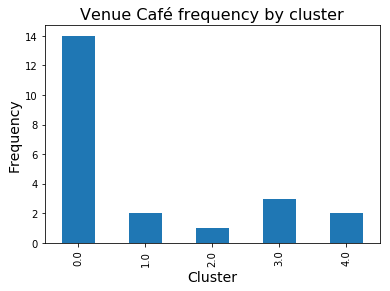

In [52]:
# plot the Cafés in Berlin by cluster
ax = berlin_clustered.groupby('Cluster Labels').count()['Café'].plot.bar()
ax.set_title('Venue Café frequency by cluster', fontsize=16)
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.show()

The best area to open a new café is Cluster 2. There is only one Café venue there. They were followed by Cluster 1 and Cluster 4. 

A quick reference to the table above showed that in Cluster 1, the other venue, Coffee Shop, is popular as well. It is important to be pointed out that a venue Café is a popular place in almost every neighborhood as many people visit this type of venue in their free time. Unfortunately, until now, there is no clear way to know, based only on the Foursquare information, which café is vegan or offers only organic products. Therefore, further analysis should be carried out to create more precise recommendations for the new business venture. 